In [28]:
# 1. Завантаження зображень
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.decomposition import TruncatedSVD
from google.colab import drive
import os

drive.mount('/content/drive')

# Шляхи до файлів
base_path = '/content/drive/MyDrive/GOIT/NP'

img1 = io.imread(os.path.join(base_path, '11.jpg'))
img2 = io.imread(os.path.join(base_path, '22.jpg'))
img3 = io.imread(os.path.join(base_path, '33.jpg'))

# Перевірка завантаження
print(f"11.jpg → розмір: {img1.shape}, тип: {img1.dtype}")
print(f"22.jpg → розмір: {img2.shape}, тип: {img2.dtype}")
print(f"33.jpg → розмір: {img3.shape}, тип: {img3.dtype}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
11.jpg → розмір: (1438, 2521, 3), тип: uint8
22.jpg → розмір: (3416, 5089, 3), тип: uint8
33.jpg → розмір: (1213, 1219), тип: uint8


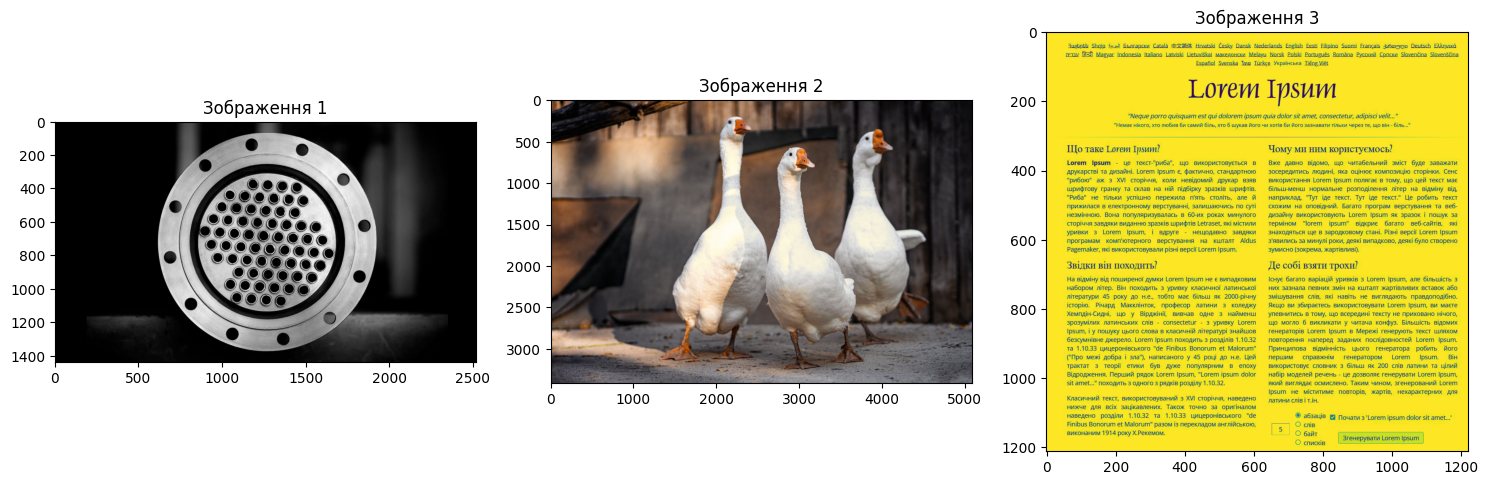

In [29]:
# 2. Виведення зображень
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img1)
axes[0].set_title('Зображення 1')
axes[0].axis('on')
axes[1].imshow(img2)
axes[1].set_title('Зображення 2')
axes[1].axis('on')
axes[2].imshow(img3)
axes[2].set_title('Зображення 3')
axes[2].axis('on')
plt.tight_layout()
plt.show()

In [33]:
# 3. Визначення розміру
print("Image 1 shape:", img1.shape)
print("Image 2 shape:", img2.shape)
print("Image 3 shape:", img3.shape)


Image 1 shape: (1438, 2521, 3)
Image 2 shape: (3416, 5089, 3)
Image 3 shape: (1213, 1219)


In [34]:
# 4. Зміна форми зображення з 3D-матриці на 2D-матрицю

# Поміщаємо всі зображення у список
images = [img1, img2, img3]
flat_images = []

for i, image in enumerate(images, 1):
    # Робимо копію зображення
    temp_img = image.copy()

    # Якщо зображення чорно-біле (2D), додаємо канали
    if temp_img.ndim == 2:
        temp_img = np.stack([temp_img] * 3, axis=-1)

    h, w, c = temp_img.shape
    print(f"Зображення {i}:")
    print(f"  - Оригінальний розмір: {temp_img.shape}")

    # Перетворення у 2D (height, width * channels)
    flat_2d = temp_img.reshape(-1, w * c)
    flat_images.append(flat_2d)

    print(f"  - Розмір 2D матриці: {flat_2d.shape}")
    print("-" * 40)

Зображення 1:
  - Оригінальний розмір: (1438, 2521, 3)
  - Розмір 2D матриці: (1438, 7563)
----------------------------------------
Зображення 2:
  - Оригінальний розмір: (3416, 5089, 3)
  - Розмір 2D матриці: (3416, 15267)
----------------------------------------
Зображення 3:
  - Оригінальний розмір: (1213, 1219, 3)
  - Розмір 2D матриці: (1213, 3657)
----------------------------------------


In [35]:
# 5.Застосування SVD декомпозиції за допомогою функції svd з бібліотеки numpy.
# Списки для збереження результатів декомпозиції
U_list = []
S_list = []
Vt_list = []

print("Початок SVD декомпозиції...")

for i, f_img in enumerate(flat_images, 1):
    # Обчислюємо SVD
    U, S, Vt = np.linalg.svd(f_img, full_matrices=False)

    # Зберігаємо результати
    U_list.append(U)
    S_list.append(S)
    Vt_list.append(Vt)

    print(f"Зображення {i}:")
    print(f"  - Матриця U: {U.shape}")
    print(f"  - Матриця Σ (S): {S.shape}")
    print(f"  - Матриця V^T: {Vt.shape}")
    print("-" * 30)

print("SVD для всіх зображень виконано!")


Початок SVD декомпозиції...
Зображення 1:
  - Матриця U: (1438, 1438)
  - Матриця Σ (S): (1438,)
  - Матриця V^T: (1438, 7563)
------------------------------
Зображення 2:
  - Матриця U: (3416, 3416)
  - Матриця Σ (S): (3416,)
  - Матриця V^T: (3416, 15267)
------------------------------
Зображення 3:
  - Матриця U: (1213, 1213)
  - Матриця Σ (S): (1213,)
  - Матриця V^T: (1213, 3657)
------------------------------
SVD для всіх зображень виконано!


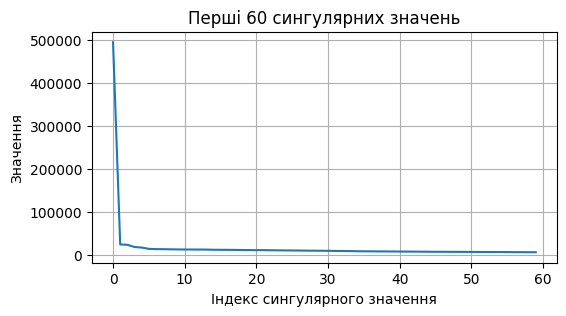

In [38]:
# 6. Візуалізуйте перші  k  значень матриці Σ
k = 60
plt.figure(figsize=(6, 3))
plt.plot(np.arange(k), S[:k])
plt.xlabel("Індекс сингулярного значення")
plt.ylabel("Значення")
plt.title(f"Перші {k} сингулярних значень")
plt.grid(True)
plt.show()

In [40]:
# 7. Усічений SVD (TruncatedSVD)
n_components = 60

# Списки для збереження стиснених даних та моделей
truncated_images = []
svd_models = []

print(f"Стиснення зображень до k={n_components} компонент...")

for i, f_img in enumerate(flat_images, 1):
    # ↓ Створюємо НОВУ модель для кожного зображення — головне виправлення
    svd_model = TruncatedSVD(n_components=n_components, random_state=42)

    # Навчаємо модель та трансформуємо (стискаємо) зображення
    truncated_img = svd_model.fit_transform(f_img)

    # Зберігаємо результат та окрему модель для кожного зображення
    truncated_images.append(truncated_img)
    svd_models.append(svd_model)

    print(f"Зображення {i}:")
    print(f"  - Початковий розмір: {f_img.shape}")
    print(f"  - Стиснений розмір: {truncated_img.shape}")
    print("-" * 40)

print("Стиснення завершено!")


Стиснення зображень до k=60 компонент...
Зображення 1:
  - Початковий розмір: (1438, 7563)
  - Стиснений розмір: (1438, 60)
----------------------------------------
Зображення 2:
  - Початковий розмір: (3416, 15267)
  - Стиснений розмір: (3416, 60)
----------------------------------------
Зображення 3:
  - Початковий розмір: (1213, 3657)
  - Стиснений розмір: (1213, 60)
----------------------------------------
Стиснення завершено!


In [41]:
# 8. Відновлення зображення зі стисненого стану
reconstructed_flat_images = []
mse_errors = []

print("Реконструкція та вимірювання помилок...")

for i in range(len(truncated_images)):
    # 1. Відновлюємо зображення зі стисненого стану
    reconstructed_flat = svd_models[i].inverse_transform(truncated_images[i])

    # 2. Обрізаємо значення до допустимого діапазону пікселів [0, 255]
    reconstructed_flat = np.clip(reconstructed_flat, 0, 255)  # ← додано
    reconstructed_flat_images.append(reconstructed_flat)

    # 3. Розраховуємо MSE (порівнюємо float-версії)
    original_float = flat_images[i].astype(np.float64)  # ← додано
    mse = np.mean(np.square(reconstructed_flat - original_float))
    mse_errors.append(mse)

    print(f"Зображення {i+1}:")
    print(f"  - Помилка реконструкції (MSE): {mse:.4f}")
    print("-" * 30)

print("Розрахунок завершено!")


Реконструкція та вимірювання помилок...
Зображення 1:
  - Помилка реконструкції (MSE): 180.4434
------------------------------
Зображення 2:
  - Помилка реконструкції (MSE): 86.7889
------------------------------
Зображення 3:
  - Помилка реконструкції (MSE): 847.5285
------------------------------
Розрахунок завершено!


Візуалізація реконструйованих зображень...


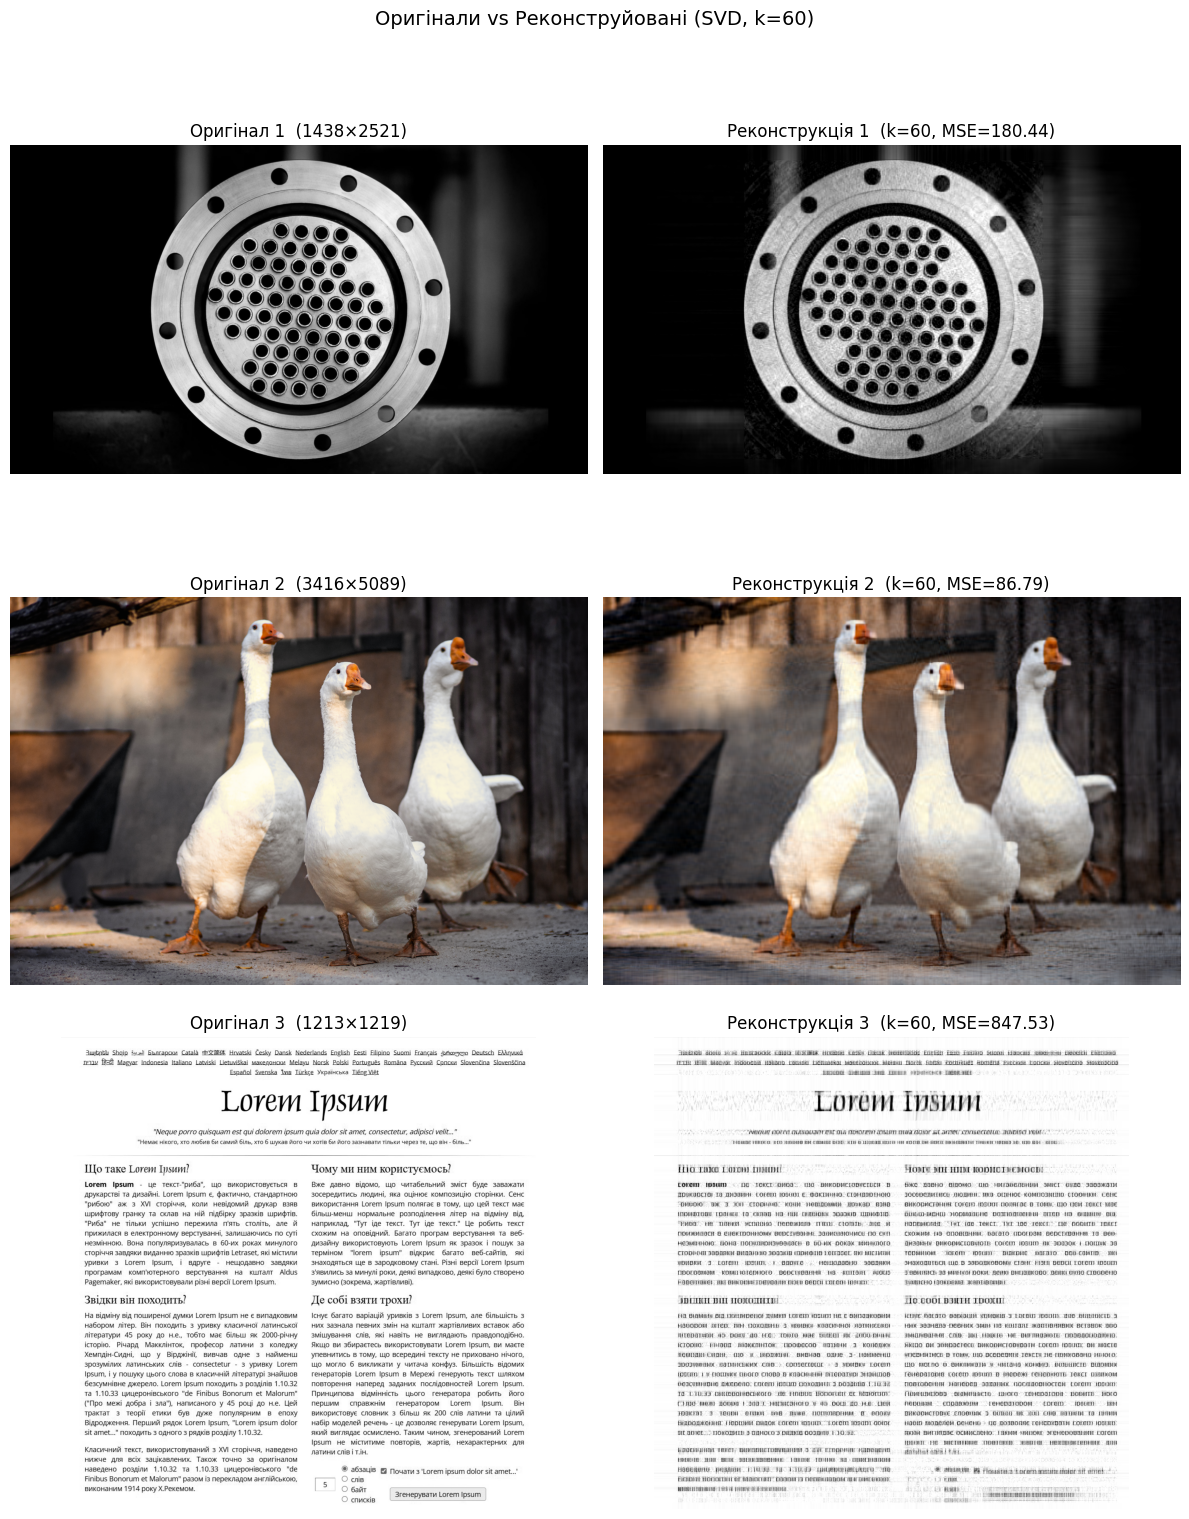

In [43]:
# 9. Відновлення форми та візуалізація реконструйованих зображень
print("Візуалізація реконструйованих зображень...")

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

for i, reconstructed_flat in enumerate(reconstructed_flat_images):
    # Отримуємо оригінальні розміри зображення
    original = images[i]
    if original.ndim == 2:
        original = np.stack([original] * 3, axis=-1)
    h, w, c = original.shape

    # 1. Змінюємо форму з 2D назад у 3D
    reconstructed_image = reconstructed_flat.reshape(h, w, c)

    # 2. Обрізаємо значення пікселів до [0, 255] та конвертуємо у uint8
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')

    # 3. Відображаємо оригінал і реконструкцію поруч
    axes[i, 0].imshow(original)
    axes[i, 0].set_title(f'Оригінал {i+1}  ({h}×{w})')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(reconstructed_image)
    axes[i, 1].set_title(f'Реконструкція {i+1}  (k=60, MSE={mse_errors[i]:.2f})')
    axes[i, 1].axis('off')

plt.suptitle('Оригінали vs Реконструйовані (SVD, k=60)', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()


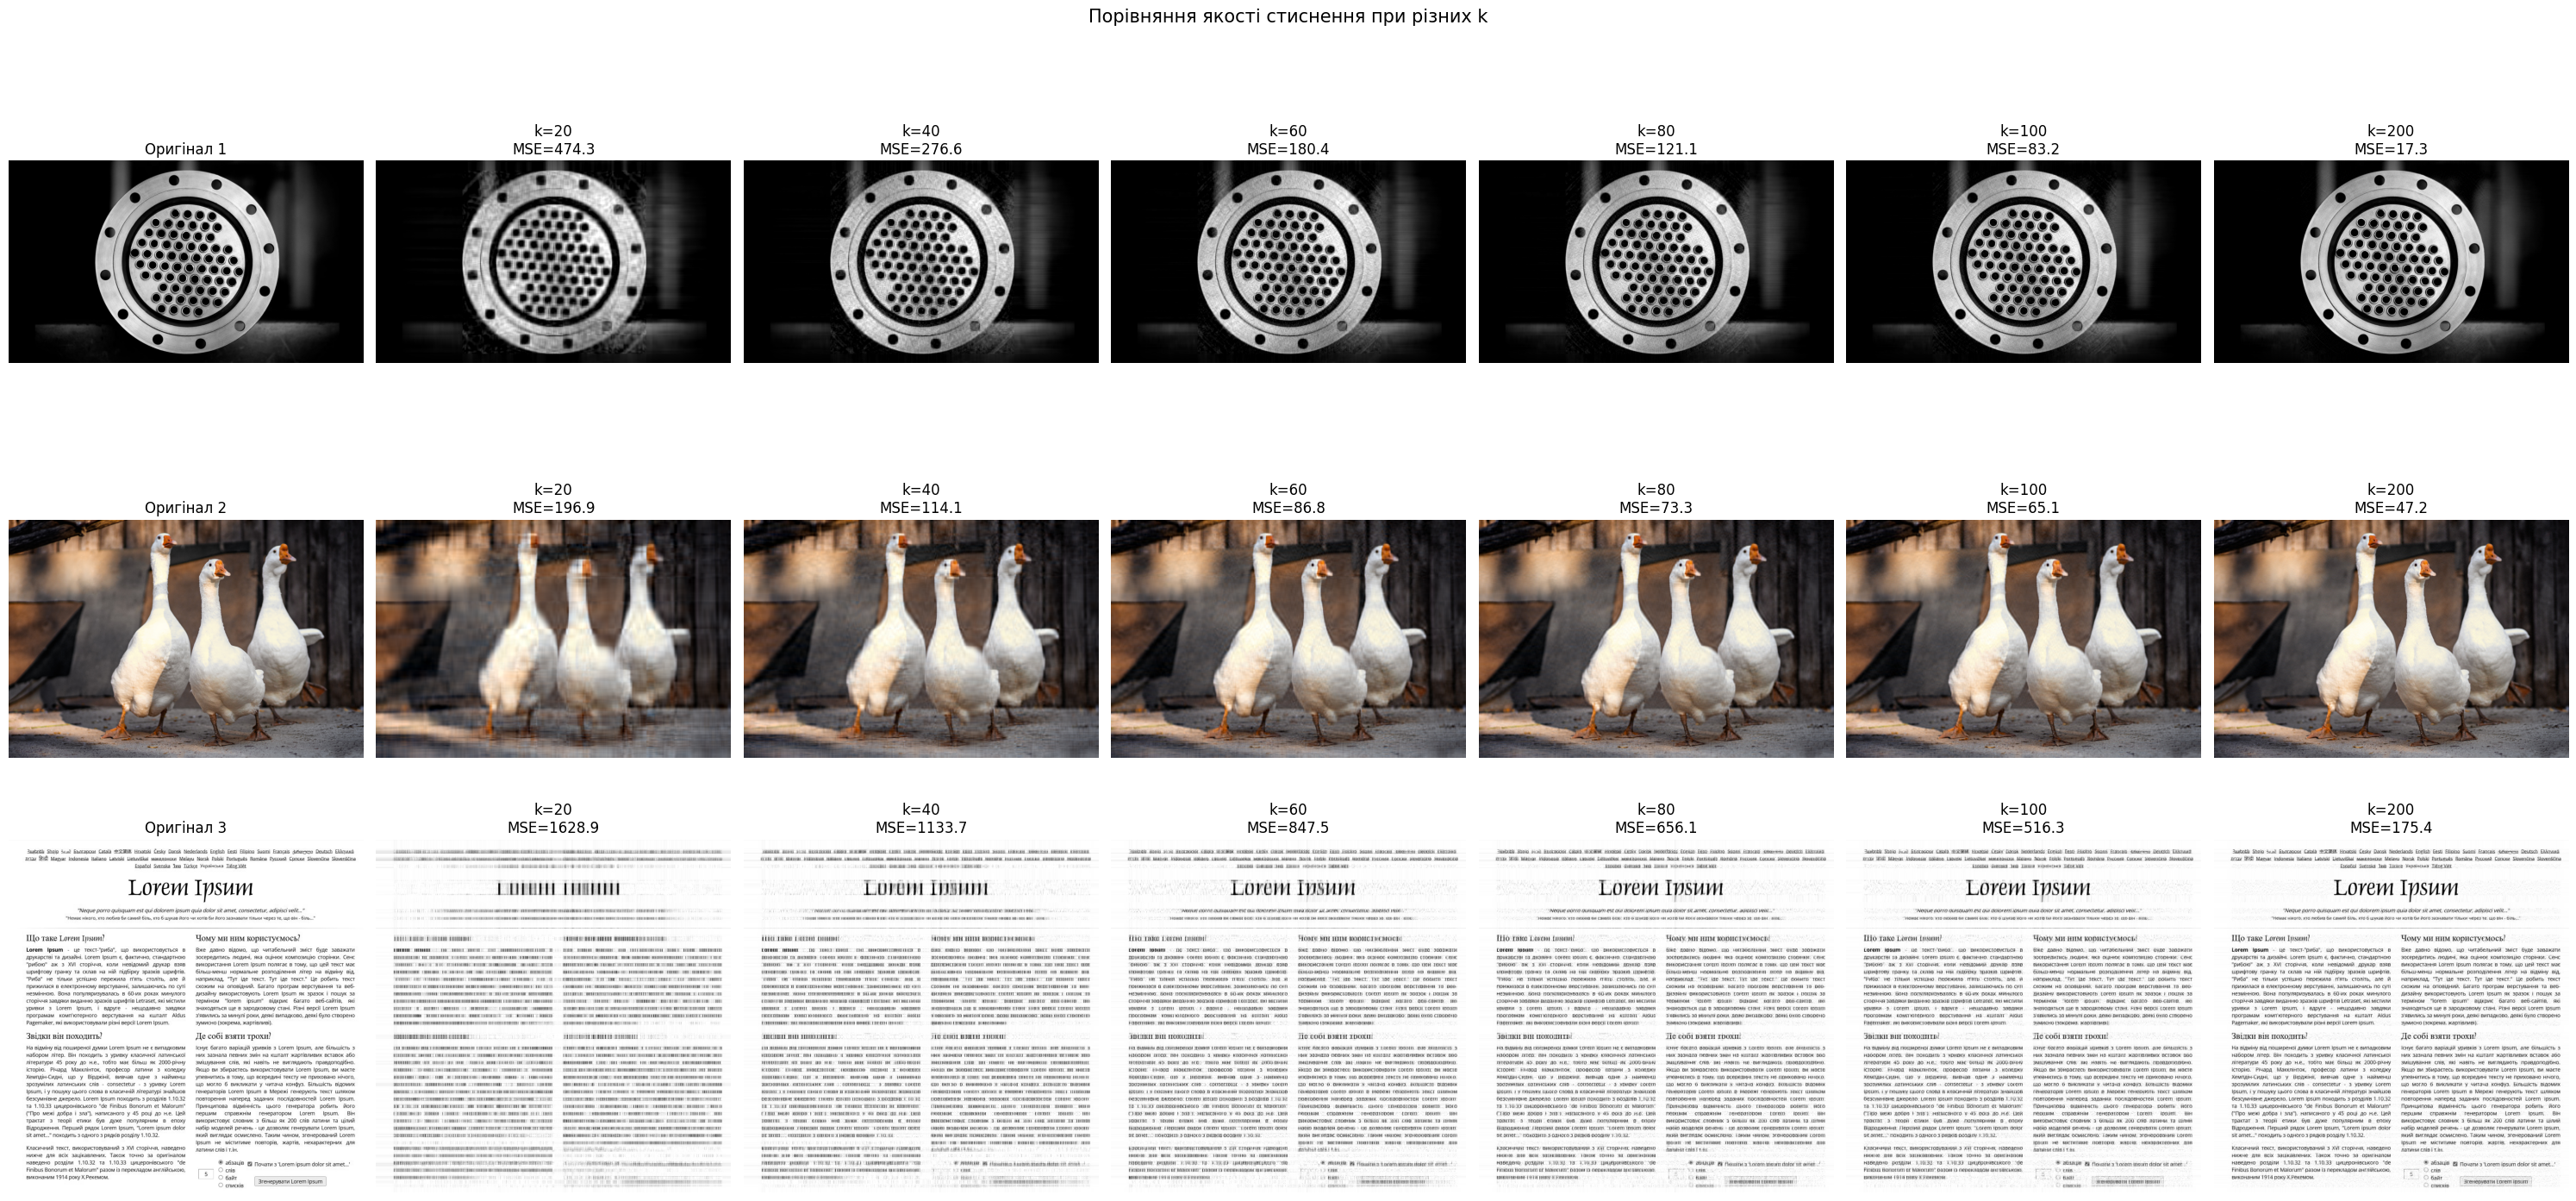

In [44]:
# 10. Експерименти з різними значеннями k
k_values = [20, 40, 60, 80, 100, 200]

fig, axes = plt.subplots(len(images), len(k_values) + 1, figsize=(30, 14))

for img_idx in range(len(images)):
    original = images[img_idx]
    if original.ndim == 2:
        original = np.stack([original] * 3, axis=-1)
    h, w, c = original.shape

    # Відображаємо оригінал у першому стовпці
    axes[img_idx, 0].imshow(original)
    axes[img_idx, 0].set_title(f'Оригінал {img_idx+1}')
    axes[img_idx, 0].axis('off')

    for k_idx, k in enumerate(k_values):
        # --- Розділ 7: Усічений SVD ---
        svd_model = TruncatedSVD(n_components=k, random_state=42)
        truncated = svd_model.fit_transform(flat_images[img_idx])

        # --- Розділ 8: Відновлення та MSE ---
        reconstructed_flat = svd_model.inverse_transform(truncated)
        reconstructed_flat = np.clip(reconstructed_flat, 0, 255)
        original_float = flat_images[img_idx].astype(np.float64)
        mse = np.mean(np.square(reconstructed_flat - original_float))

        # --- Розділ 9: Reshape та візуалізація ---
        reconstructed_image = reconstructed_flat.reshape(h, w, c)
        reconstructed_image = np.clip(reconstructed_image, 0, 255).astype('uint8')

        axes[img_idx, k_idx + 1].imshow(reconstructed_image)
        axes[img_idx, k_idx + 1].set_title(f'k={k}\nMSE={mse:.1f}')
        axes[img_idx, k_idx + 1].axis('off')

plt.suptitle('Порівняння якості стиснення при різних k', fontsize=15, y=1.01)
plt.tight_layout()
plt.show()


## **Висновки:**
**Зображення 1 (чорно-біле, технічне):**

* При k=20 (MSE=474.3) — помітне розмиття та артефакти.
* При k=100 (MSE=83.2) — якість суттєво краща.
* При k=200 (MSE=17.3) — відмінність від оригіналу мінімальна.
* Прийнятний результат починається з k>=60.

**Зображення 2 (звичайне фото, кольорове):**
* Найнижчі значення MSE серед усіх — зображення з плавними градієнтами стискається найкраще.
* Вже при k=60 (MSE=86,8) якість візуально прийнятна.
* При k=100 (MSE=65.1) якість дуже близька до оригіналу.

**Зображення 3 (текст, документ):**
* Найвищі MSE серед усіх — текст стискається найгірше.
* При k=20 (MSE=1628.9) текст нечитабельний.
* Навіть при k=200 (MSE=175.4) втрати інформації залишаються значними.

## **Загальний висновок:**
* k < 40 — неприйнятна якість для всіх типів зображень.
* k = 80–100 — оптимальний компроміс між якістю та ступенем стиснення, окрім зображення з текстом.
* Зображення з дрібними деталями (текст, графіка) потребують більшого k, ніж фотографії з плавними градієнтами.